In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# pd.set_option('future.no_silent_downcasting', True)

In [17]:
#since I am trying to find the age of the possum, I can drop the case number, site number and the population 

df = pd.read_csv('possum.csv')


df = df.drop(df.columns[0], axis=1) #dropping case
df = df.drop(df.columns[0], axis=1) #dropping site
df = df.drop(df.columns[0], axis=1) #dropping pop

df = df.dropna(subset=['age']) #drops the rows where age is missing
df.replace({'m': 0, 'f': 1}, inplace = True) #sets the m value to 0 and the f value to 1
df.fillna({'footlgth': df['footlgth'].median()}, inplace = True) #sets the NA values in the footlgth column to the median value

print(df.columns)

Index(['sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth',
       'earconch', 'eye', 'chest', 'belly'],
      dtype='object')


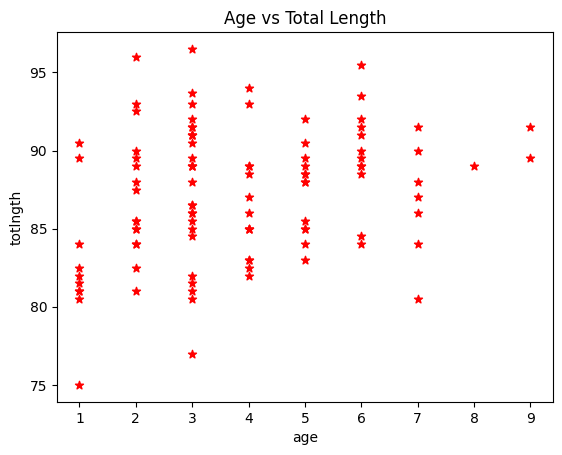

In [4]:
plt.scatter(df.age, df.totlngth, marker='*', c='red')
plt.xlabel('age')
plt.ylabel('totlngth')
plt.title('Age vs Total Length')
plt.show()

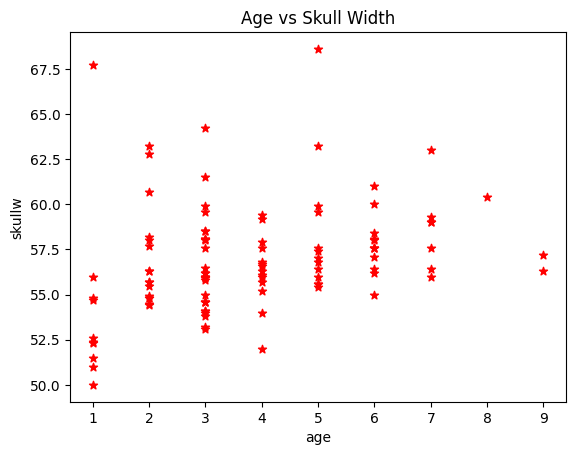

In [5]:
plt.scatter(df.age, df.skullw, marker='*', c='red')
plt.xlabel('age')
plt.ylabel('skullw')
plt.title('Age vs Skull Width')
plt.show()

In [18]:
x = df.drop(columns= 'age') #features
y = df['age'] #labels

x = x.values
y = y.values

# print(x)
# print(y)

In [19]:
#normalizing the features
x = x.T

for i in x:
    i = (i - i.min()) / (i.max() - i.min())

# x = (x - np.min(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0))

x = x.T

In [20]:
#split into train and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
#computing the cost
def computeCost(x, y, w, b):
    yhat = x @ w + b
    cost = (1/len(x))*np.sum((yhat - y)**2)
    return cost

In [22]:
#gradient descent
def gradientDescent(x, y, w, b, lr, epochs):
    costs = []

    for i in range(epochs):
        yhat = x @ w + b
        gradW = (1/len(x)) * x.T @ (x @ w - y)
        gradB = (1/len(x)) * np.sum(yhat - y)
        w = w - lr * gradW
        b = b - lr * gradB
        cost = computeCost(x, y, w, b)
        costs.append(cost)

        if i%10 == 0:
            print("Iteration",i,":")
            print("weights:", w)
            print("bias:", b)

    return w, b, costs

In [23]:
w = np.zeros(x_train.shape[1])
b = 0

weightsT, biasT, costsT = gradientDescent(x_train, y_train, w, b, lr=0.00001, epochs=10000)

# print(costsT)
y_pred = x_test @ weightsT + biasT

mse = np.mean((y_pred - y_test) ** 2)

r2 = r2_score(y_test, y_pred) * 100

print("MSE:", mse)
print("R2 score:", r2)

Iteration 0 :
weights: [1.4691358024691356e-05 0.003543382716049383 0.0021787901234567903
 0.003332975308641975 0.00141179012345679 0.002594222222222223
 0.0018261728395061727 0.0005783703703703708 0.0010378395061728396
 0.0012545679012345681]
bias: 3.790123456790124e-05
Iteration 10 :
weights: [4.869460126979366e-05 0.011598962617187493 0.007145103111959675
 0.010894286499642343 0.004592812102390032 0.008407016236176474
 0.005924255391965704 0.0019139262509261872 0.0034117636008618316
 0.004144868131493187]
bias: 0.00012283453846140396
Iteration 20 :
weights: [5.0547679780632754e-05 0.01185782503426944 0.007320978038418605
 0.011117339920783459 0.004659232027310667 0.008487562569149521
 0.0059890224973339935 0.001982739980854918 0.0035061921682704843
 0.004285512215083278]
bias: 0.00012402131865316463
Iteration 30 :
weights: [5.14986351253959e-05 0.011896744305651895 0.0073616897716991675
 0.011133409535411686 0.004637765300556606 0.008406595797269942
 0.0059402140730726825 0.00201580

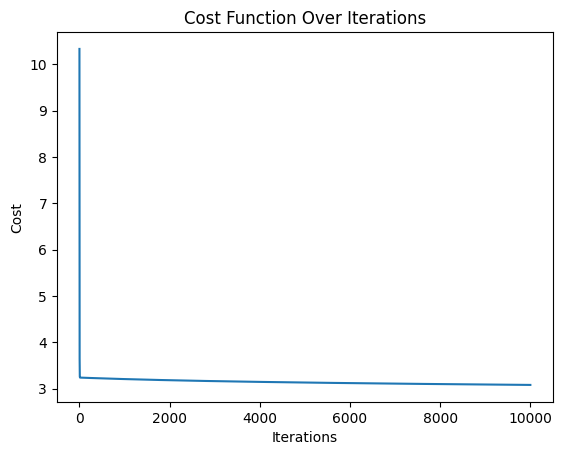

Mean Squared Error on Test Set: 4.093125538314861
Predicted vs Actual Age on Test Set:
Predicted: 3.69, Actual: 3.00
Predicted: 3.85, Actual: 7.00
Predicted: 4.14, Actual: 5.00
Predicted: 4.04, Actual: 5.00
Predicted: 3.51, Actual: 2.00
Predicted: 3.59, Actual: 5.00
Predicted: 3.48, Actual: 3.00
Predicted: 4.40, Actual: 5.00
Predicted: 3.58, Actual: 9.00
Predicted: 3.88, Actual: 8.00


In [25]:
#Chatgpt plot + analysis console printouts
plt.plot(costsT)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

mse_test = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error on Test Set: {mse_test}")

print("Predicted vs Actual Age on Test Set:")
for pred, actual in zip(y_pred[:10], y_test[:10]):
    print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")